In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [12]:
data_dirname = '../data/'
label_plant_filename = 'species.csv'
label_plant_dict = pd.read_csv(data_dirname+label_plant_filename, index_col=0, header=None)
label_plant_dict = label_plant_dict.to_dict()[1]

model_dirname_snmf = '../models/matrix_decomposition/'
snmf_comp_filename = 'snmf_components.npz'
df = np.load(model_dirname_snmf+snmf_comp_filename)
classes = df['classes']
snmf_components = df['components'].item()
snmf_Omegas = df['Omegas'].item()


model_dirname_sntd = '../models/tucker_decomposition/'
sntd_comp_filename = 'sntd_components.npz'
df = np.load(model_dirname_sntd+sntd_comp_filename)
sntd_components = df['components'].item()
sntd_Omegas = df['Omegas'].item()

print label_plant_dict

{1: 'Althaea officinalis', 2: 'Aronia melanocarpa', 3: 'Bergenia crassifolia', 4: 'Betula pendula (buds)', 5: 'Betula pendula (leaves)', 6: 'Helichrysum arenarium', 7: 'Sambucus nigra (flowers)', 8: 'Valeriana officinalis', 9: 'Ginkgo biloba', 10: 'Melilotus officinalis', 11: 'Origanum vulgare', 12: 'Panax ginseng', 13: 'Rhamnus cathartica', 14: 'Fragaria vesca', 15: 'Hypericum perforatum', 16: 'Viburnum opulus', 17: 'Coriandrum sativum', 18: 'Urtica dioica', 20: 'Frangula alnus', 23: 'Convallaria transcaucasica', 24: 'Potentilla erecta', 25: 'Tilia cordata', 26: 'Linum usitatissimum', 27: 'Arctium lappa', 28: 'Tussilago farfara', 29: 'Juniperus communis', 30: 'Mentha x piperita', 31: 'Calendula officinalis', 32: 'Tanacetum vulgare', 33: 'Plantago major', 34: 'Artemisia absinthium', 35: 'Leonurus quinquelobatus', 36: 'Silybum marianum', 37: 'Rhodiola rosea', 38: 'Matricaria chamomilla', 39: 'Senna alexandrina', 40: 'Polemonium caeruleum', 41: 'Glycyrrhiza glabra', 42: 'Pinus sylvestris

Bergenia crassifolia


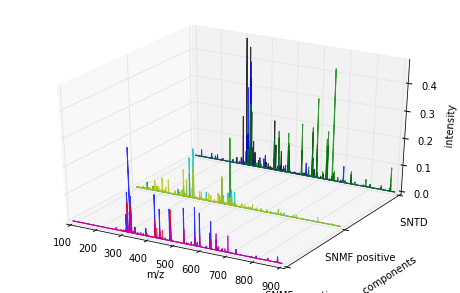

Betula pendula (buds)


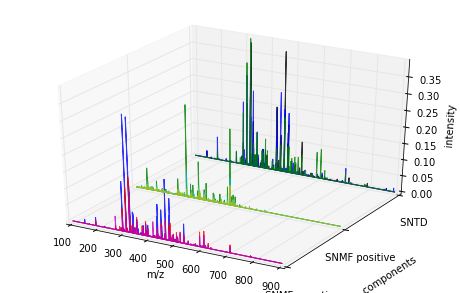

Helichrysum arenarium


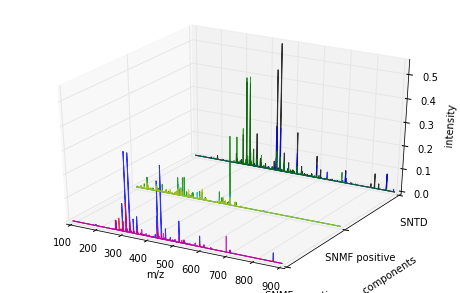

Valeriana officinalis


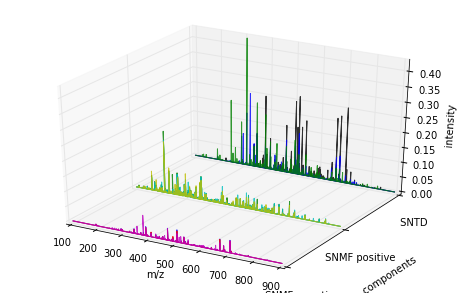

Melilotus officinalis


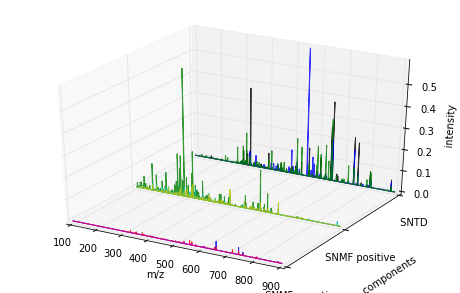

Origanum vulgare


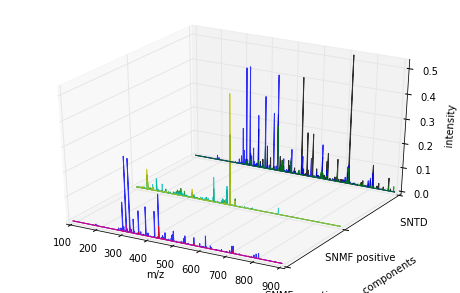

Panax ginseng


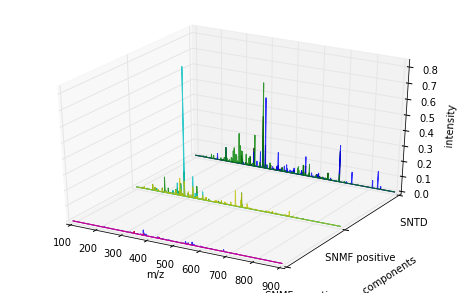

Hypericum perforatum


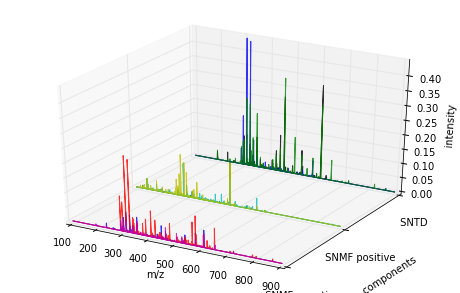

Coriandrum sativum


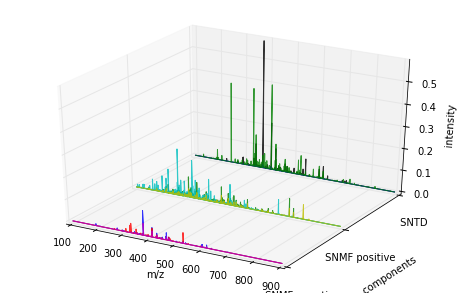

Urtica dioica


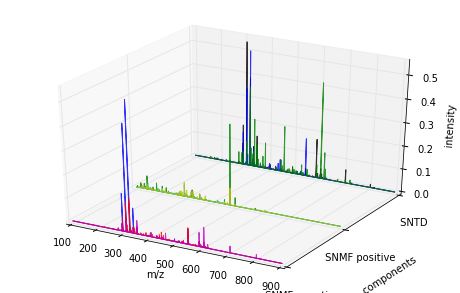

Potentilla erecta


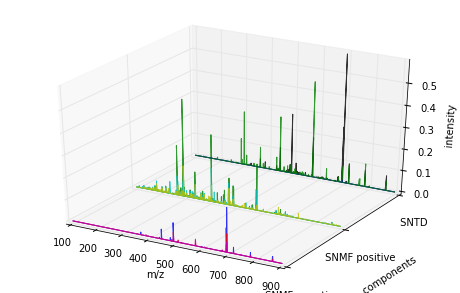

Linum usitatissimum


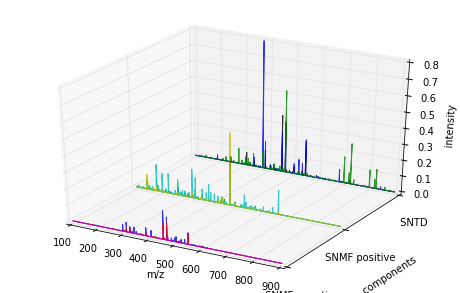

Arctium lappa


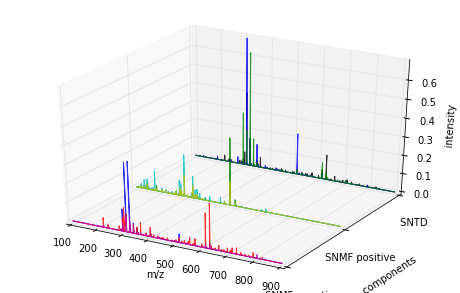

Tussilago farfara


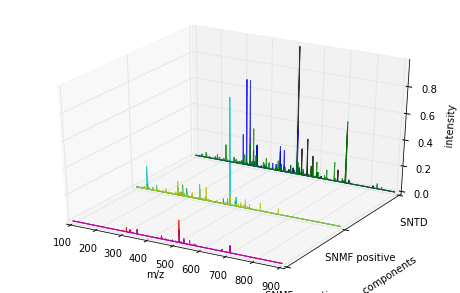

Mentha x piperita


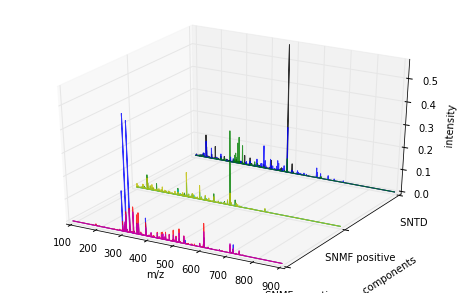

Calendula officinalis


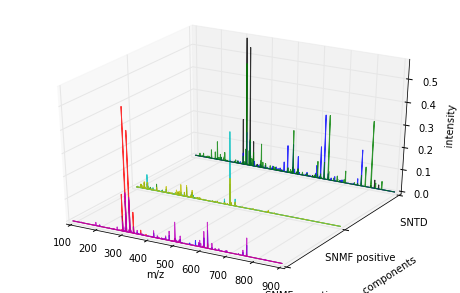

Tanacetum vulgare


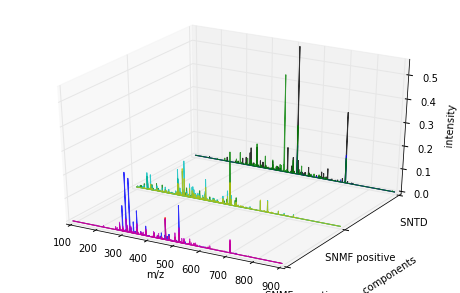

Plantago major


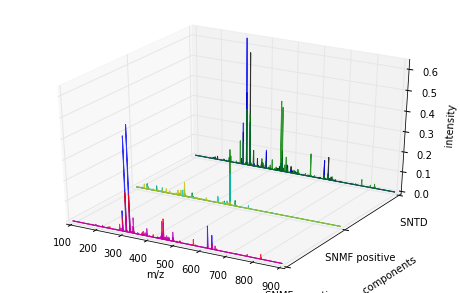

Artemisia absinthium


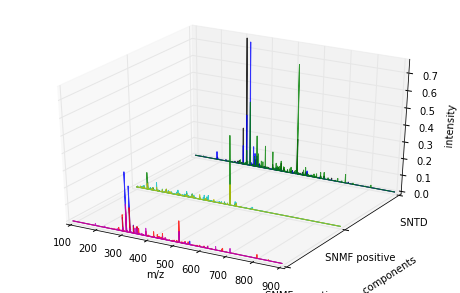

Leonurus quinquelobatus


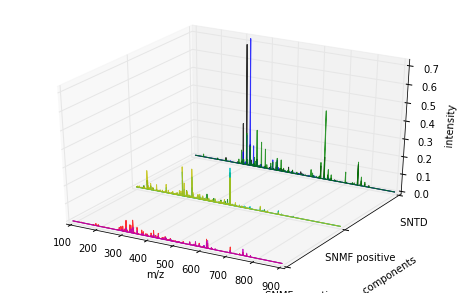

Silybum marianum


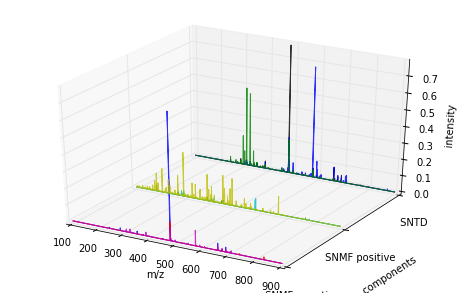

Rhodiola rosea


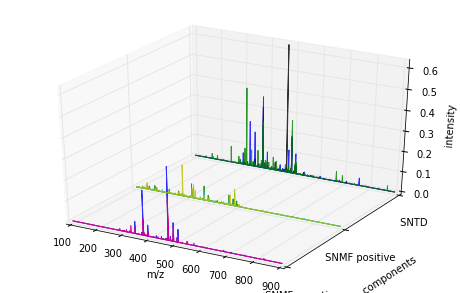

Matricaria chamomilla


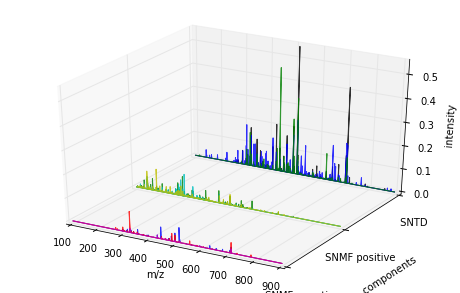

Polemonium caeruleum


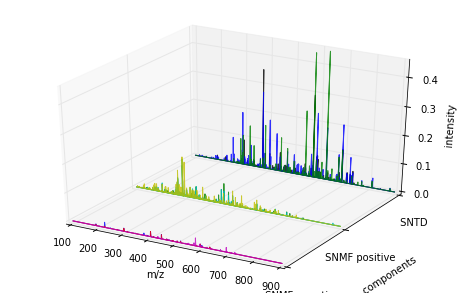

Glycyrrhiza glabra


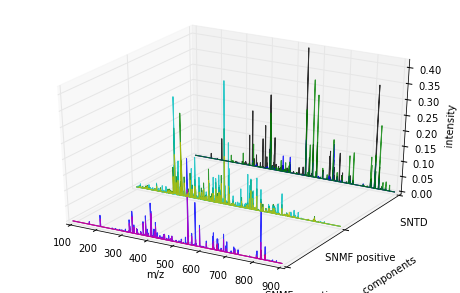

Pinus sylvestris


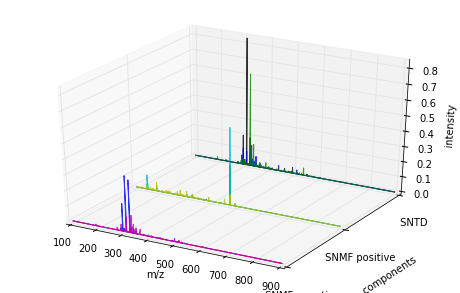

Anethum graveolens


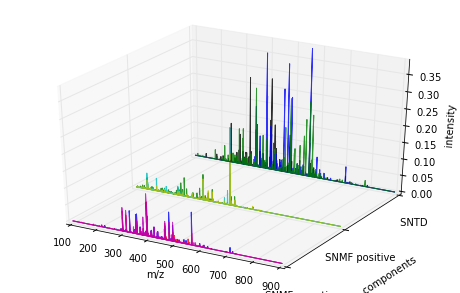

Equisetum arvense


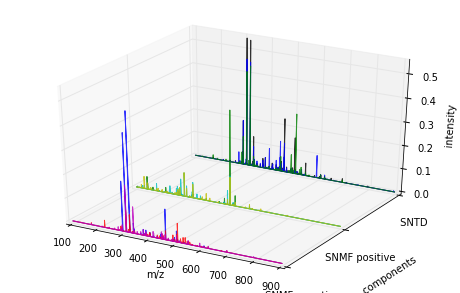

Humulus lupulus


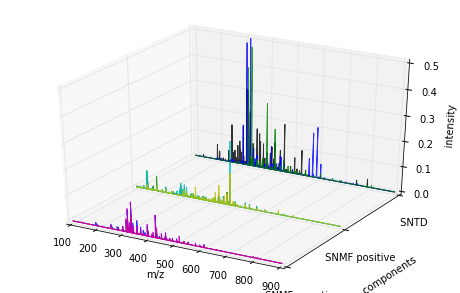

Thymus serpyllum


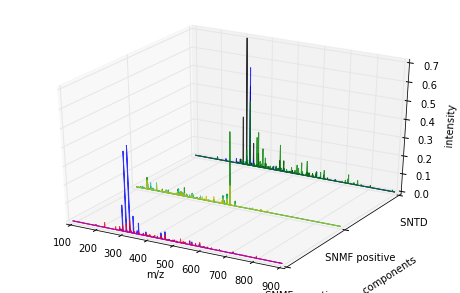

Bidens tripartita


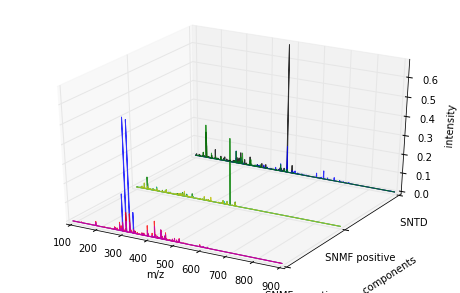

Salvia officinalis


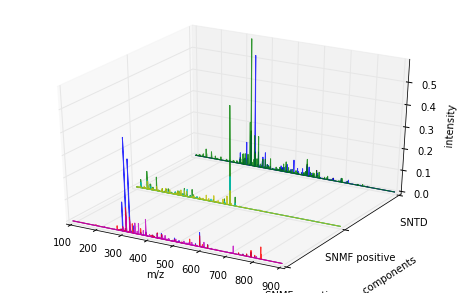

Eleutherococcus senticosus


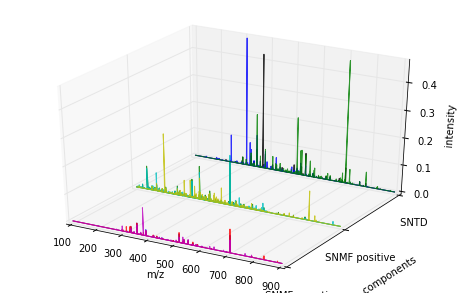

Aerva lanata


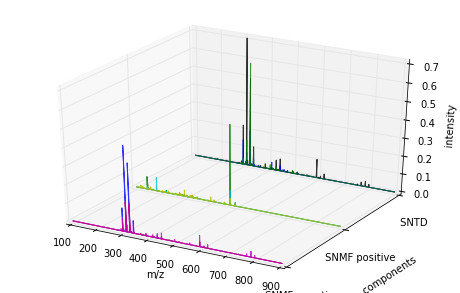

Eleutherococcus sessiliflorus


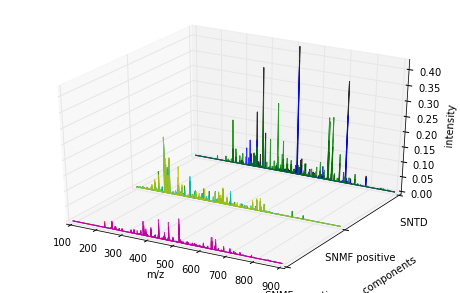

Aralia elata


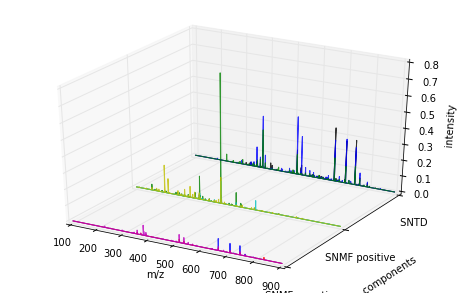

Oplopanax elatus


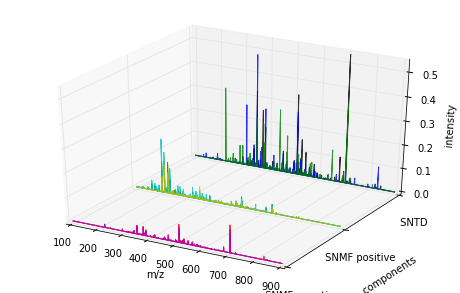

Inula helenium


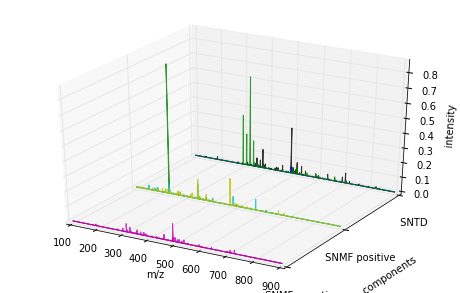

Helianthus tuberosus


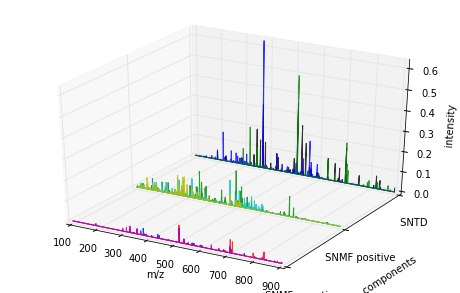

Angelica archangelica


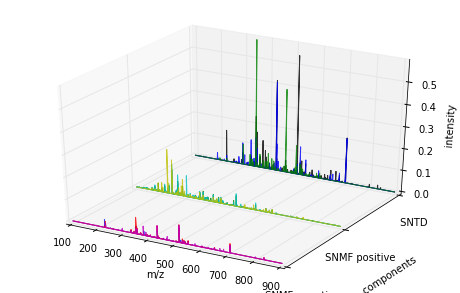

Acorus calamus


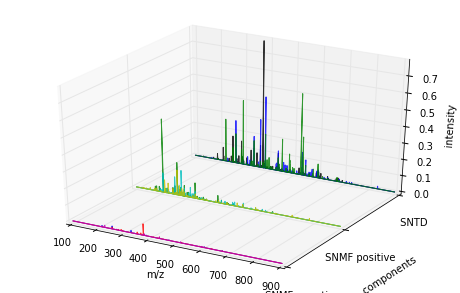

Rosa majalis


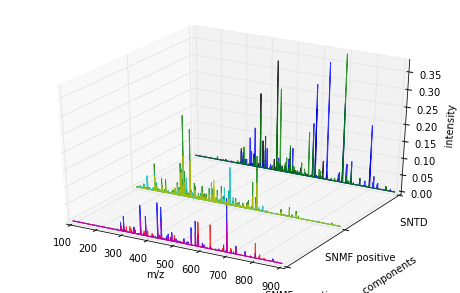

Sambucus nigra (roots)


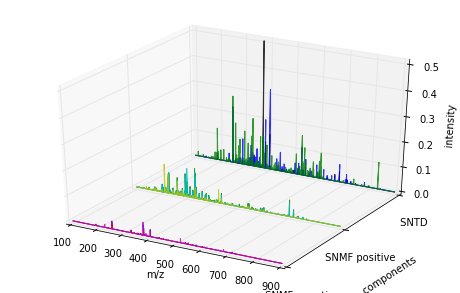

Levisticum officinale


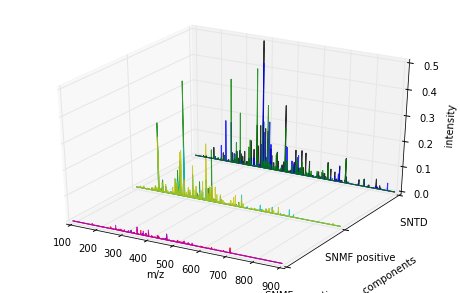

Aegopodium podagraria


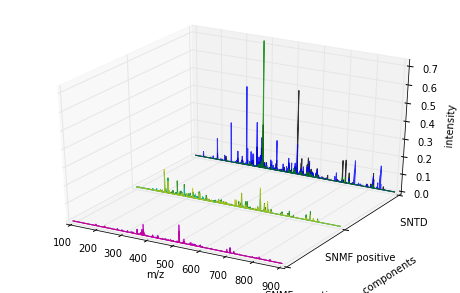

Bupleurum aureum


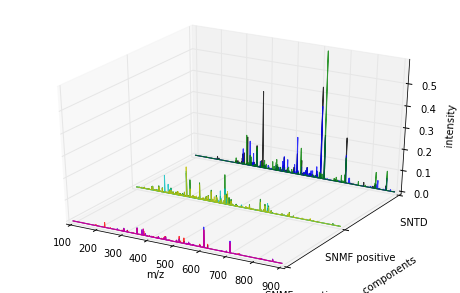

Pimpinella saxifraga


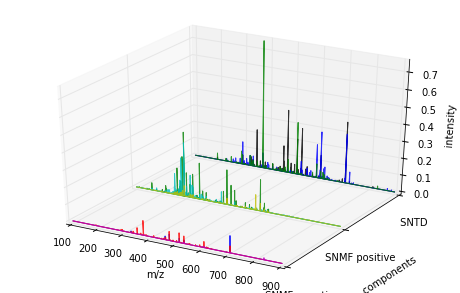

Heracleum sibiricum


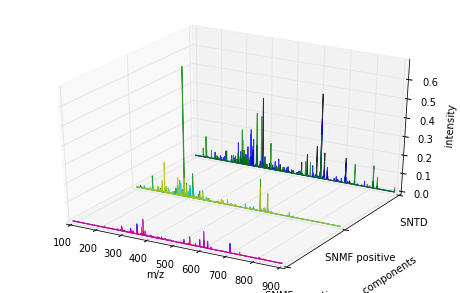

Daucus carota


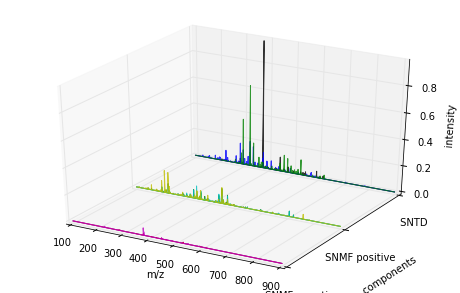

Petroselinum crispum


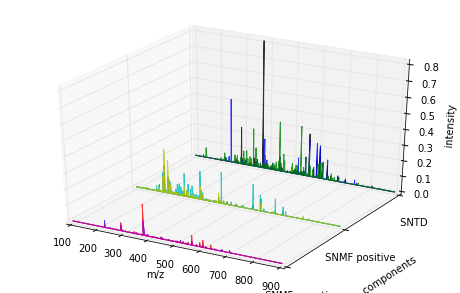

Foeniculum vulgare


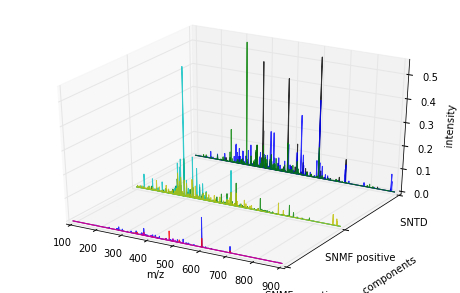

Pimpinella anisum


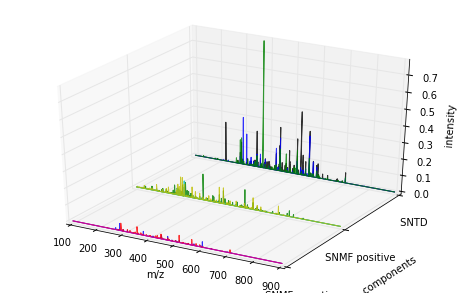

Asarum europaeum


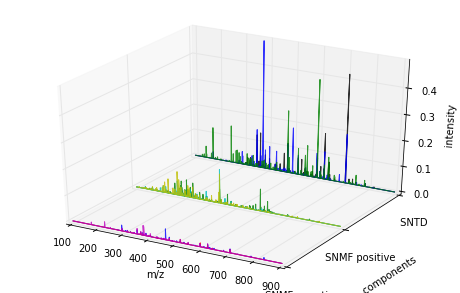

Cichorium intybus


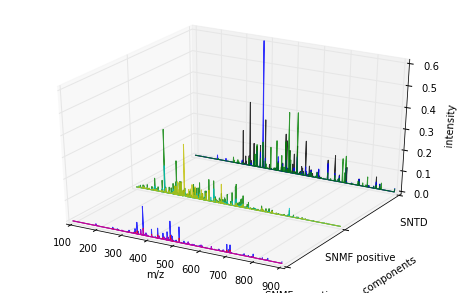

Dioscorea caucasica


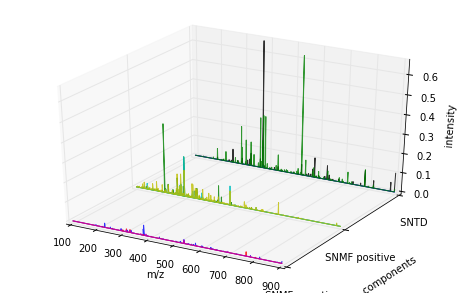

Taraxacum officinale


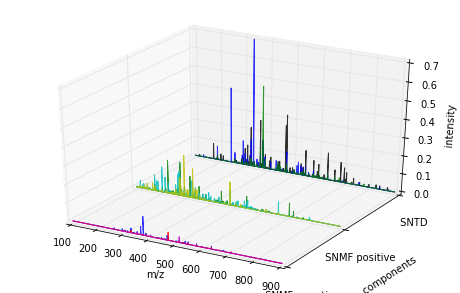

Hedysarum neglectum


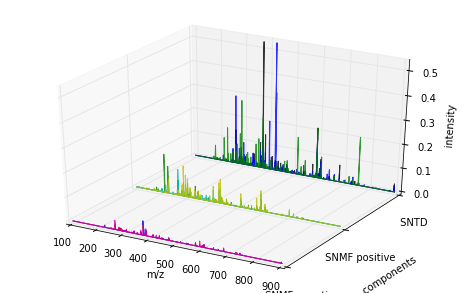

Astragalus membranaceus


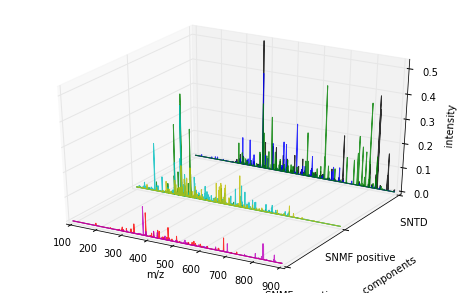

In [14]:
plt.clf()

for i_cl in xrange(1, len(classes)):
    current_component_class = classes[i_cl]
    print label_plant_dict[current_component_class]
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111, projection='3d')
    mz_axis = np.arange(100, 900)
    current_snmf_components = snmf_components[current_component_class][:, snmf_Omegas[current_component_class]]
    current_sntd_components = sntd_components[current_component_class][:, sntd_Omegas[current_component_class]]
    zmax = 0.
    for i in xrange(len(snmf_Omegas[current_component_class])):
        ax.plot(mz_axis, current_snmf_components[:len(mz_axis), i],  0, zdir='y', alpha=0.8)
        ax.plot(mz_axis, current_snmf_components[len(mz_axis):, i], 0.1, zdir='y', alpha=0.8)
        zmax = max(zmax, current_snmf_components[:len(mz_axis), i].max())
        zmax = max(zmax, current_snmf_components[len(mz_axis):, i].max())
    for i in xrange(len(sntd_Omegas[current_component_class])):
        ax.plot(mz_axis, current_sntd_components[:, i], 0.2, zdir='y', alpha=0.8)
        zmax = max(zmax, current_sntd_components[:, i].max())
    ax.set_xlabel('m/z')
    ax.set_yticks([0., 0.1, 0.2])
    ax.set_ylim([0., 0.2])
    ax.set_yticklabels(['\n SNMF negative', '\n SNMF positive', '\n SNTD'])
    ax.set_ylabel('\n components', linespacing=6.2)
    ax.set_zlabel('intensity')
    ax.set_zlim([0., zmax])
    
    #plt.savefig('./run 2/'+str(classes[i_cl])+'.pdf')
    plt.show()